In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pradeepan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pradeepan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pradeepan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df1=pd.read_csv("twitter_data.csv")
df2=pd.read_csv("train.csv")

In [4]:
df1 =df1[["tweet", "class"]]
df1.columns = ["tweet", "class1"]
df1.head()

,tweet,class1
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [5]:
df2 =df2[["tweet", "label"]]
df2.columns = ["tweet", "class1"]
df2.head()

,tweet,class1
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0


In [6]:
tweet_df = pd.concat([df1, df2])
tweet_df['class1'] = tweet_df['class1'].replace(0, 1)
tweet_df['class1'] = tweet_df['class1'].replace(2, 0)
tweet_df

,tweet,class1
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
31957,ate @user isz that youuu?ðððððð...,1
31958,to see nina turner on the airwaves trying to...,1
31959,listening to sad songs on a monday morning otw...,1
31960,"@user #sikh #temple vandalised in in #calgary,...",1


In [8]:
data_to_add = [
    ["i hate you", 1],
    ["i kill you", 1],
    ["She felt an overwhelming sense of love whenever she looked into her child's eyes.",0],
    ["Their love for each other grew stronger with every passing day.",0],
    ["Love knows no boundaries, transcending differences of race, religion, or background.",0],
    ["The couple's love story is one of resilience and unwavering commitment through life's challenges.",0],
    ["He expressed his love through small, thoughtful gestures that made her heart flutter.",0],
    ["Love is the cornerstone of their enduring friendship that has lasted for decades.",0],
    ["The warmth in their embraces conveyed a love that words couldn't fully capture.",0],
    ["Love can be found in the simplest moments, like sharing laughter over a cup of coffee.",0],
    ["Their love for nature led them to explore the world together, cherishing every adventure",0],
    ["Love has the power to heal, to inspire, and to bring out the best in people.",0],
    ["Enjoying a lazy Sunday with a good book and a cup of coffee. #RelaxationTime #Bookworm",0],
    ["Had an inspiring conversation with a mentor today. Grateful for their guidance and wisdom. #Gratitude #Mentorship",0],

]
new_data_df = pd.DataFrame(data_to_add, columns=['tweet', 'class1'])
tweet_df = pd.concat([tweet_df, new_data_df], ignore_index=True)
tweet_df.tail()

,tweet,class1
56768,"Love can be found in the simplest moments, lik...",0
56769,Their love for nature led them to explore the ...,0
56770,"Love has the power to heal, to inspire, and to...",0
56771,Enjoying a lazy Sunday with a good book and a ...,0
56772,Had an inspiring conversation with a mentor to...,0


In [9]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https?\S+|www\S+|http\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'ð', '', tweet)
    tweet = tweet.replace("user", "")
    # Add more data cleaning steps here if required
    return tweet

In [10]:
tweet_df['tweet'] = tweet_df['tweet'].apply(data_processing)

In [11]:
lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    tweet = [lemmatizer.lemmatize(word) for word in word_tokenize(data)]
    return " ".join(tweet)

In [12]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lemmatizing)

In [13]:
tweet_df = tweet_df.drop_duplicates('tweet')

In [14]:
tweet_df['class1'].value_counts()

class1
1    48781
0     4111
Name: count, dtype: int64

<AxesSubplot: xlabel='class1', ylabel='count'>

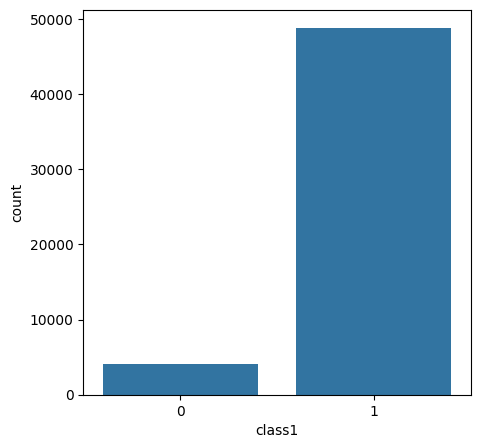

In [15]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='class1', data = tweet_df)

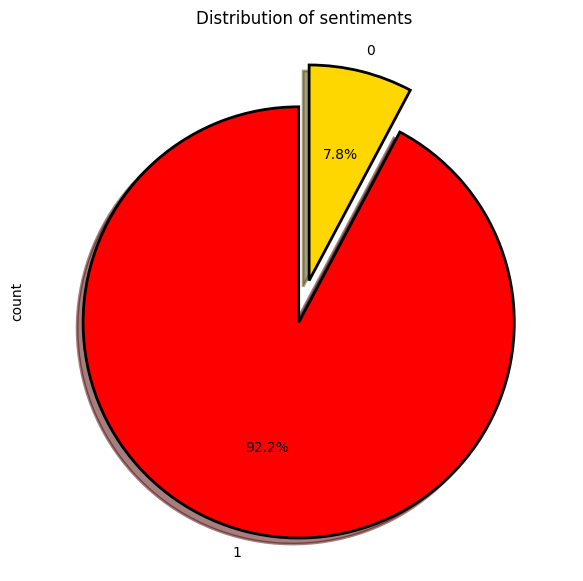

In [16]:

fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")  
wp = {'linewidth': 2, 'edgecolor': "black"}
tags = tweet_df['class1'].value_counts()


explode = [0.1] * len(tags)  

tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, startangle=90,
          wedgeprops=wp, explode=explode, labels=tags.index)
plt.title('Distribution of sentiments')
plt.show()

In [17]:
non_hate_tweets = tweet_df[tweet_df.class1== 0]
non_hate_tweets.head()

,tweet,class1
0,rt a a woman you shouldnt complain about clean...,0
40,momma said no pussy cat inside my doghouse,0
63,simplyaddictedtoguys woof woof hot scally lad,0
66,woof woof and hot sol,0
67,lemmie eat a oreo amp do these dish one oreo lol,0


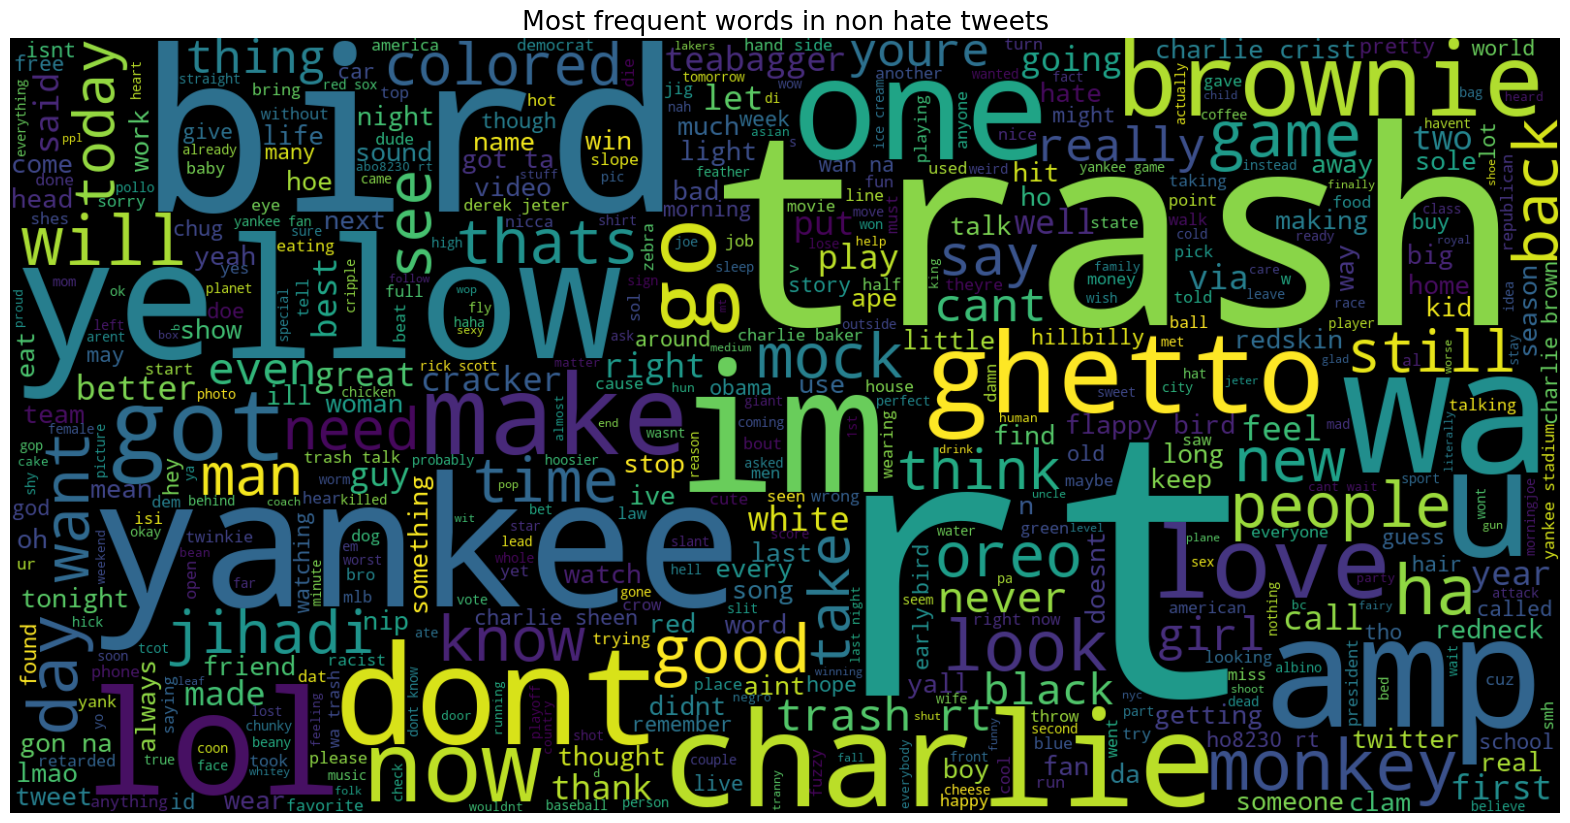

In [20]:
from wordcloud import WordCloud
text = ' '.join([word for word in non_hate_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in non hate tweets', fontsize = 19)
plt.show()

In [21]:
neg_tweets = tweet_df[(tweet_df['class1'] == 1)]
neg_tweets.head()

,tweet,class1
1,rt boy dat coldtyga dwn bad for cuffin dat hoe...,1
2,rt dawg rt you ever fuck a bitch and she start...,1
3,rt she look like a tranny,1
4,rt the shit you hear about me might be true or...,1
5,the shit just blow meclaim you so faithful and...,1


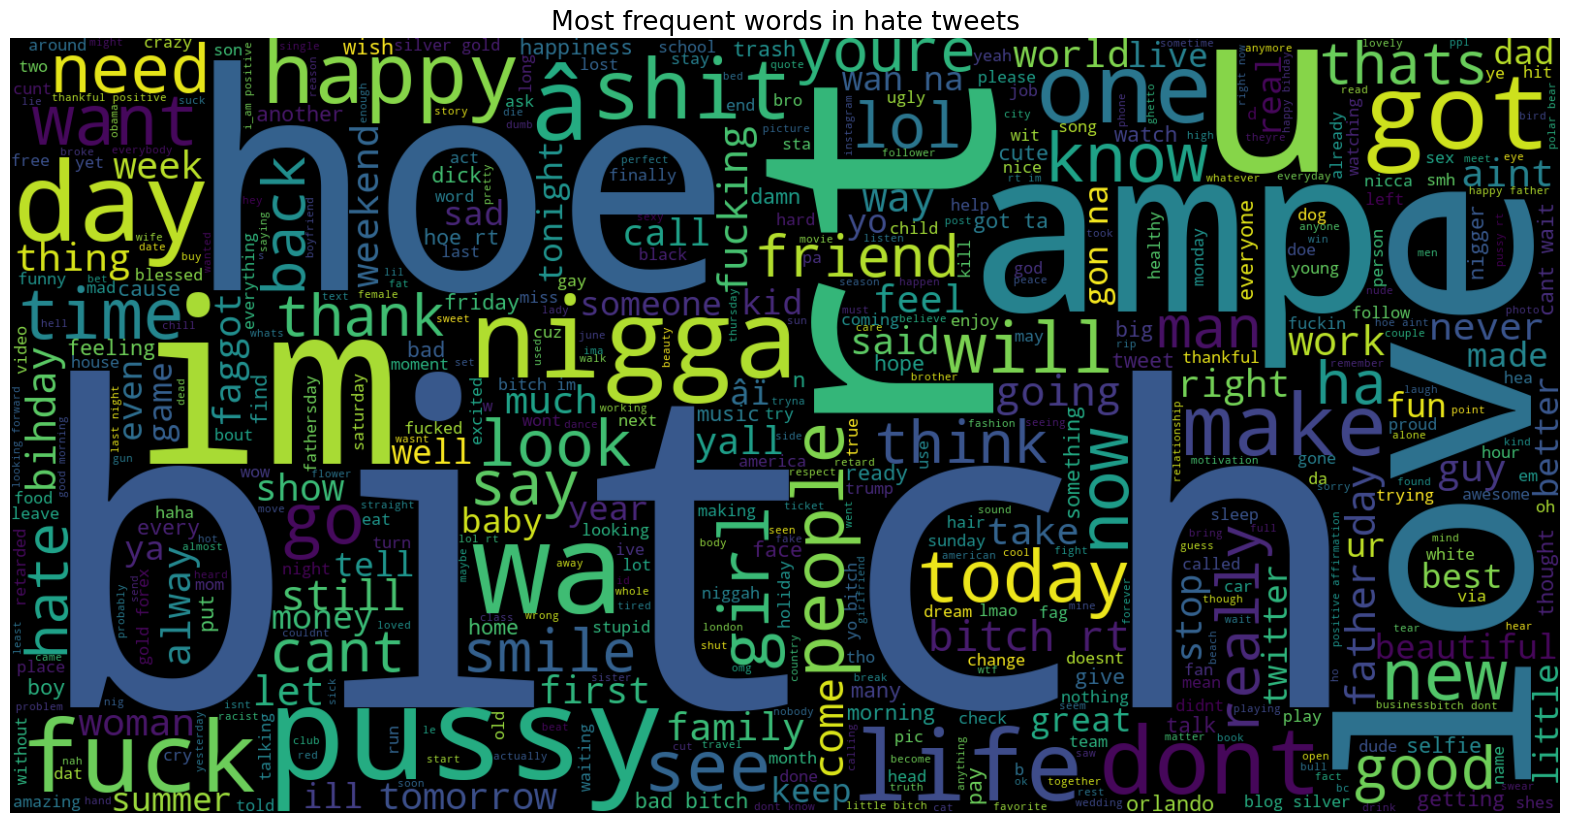

In [22]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1, 2)).fit(tweet_df['tweet'])
feature_names = vect.get_feature_names_out()

print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 353017

First 20 features: 
['0000001' '0000001 polluting' '00027' '00027 photooftheday' '001' '0035'
 '007' '00h30' '01' '01 blog' '01 croatia' '01 for' '01 in' '01 is'
 '01 loss' '01 shopalyssas' '0115' '0115 8599968' '0161' '0161 manny']


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


vect = TfidfVectorizer(ngram_range=(1, 3)).fit(tweet_df['tweet'])
feature_names = vect.get_feature_names_out()

print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 803895

First 20 features: 
['0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '00027 photooftheday' '00027 photooftheday music' '001' '0035' '007'
 '00h30' '01' '01 blog' '01 blog silver' '01 croatia' '01 croatia happy'
 '01 for' '01 for 4995' '01 for 7900' '01 in' '01 in may']


In [25]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf_vectorizer.fit_transform(tweet_df['tweet'])
Y = tweet_df['class1']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
svm_predict = svm_classifier.predict(x_test)
svm_acc = accuracy_score(svm_predict, y_test)
print("SVM Test accuracy: {:.2f}%".format(svm_acc * 100))

SVM Test accuracy: 96.12%


In [28]:

print("SVM Classification Report:\n", classification_report(y_test, svm_predict))
conf_matrix_svm = confusion_matrix(y_test, svm_predict)
print("SVM Confusion Matrix:\n", conf_matrix_svm)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71       803
           1       0.97      0.99      0.98      9776

    accuracy                           0.96     10579
   macro avg       0.90      0.81      0.84     10579
weighted avg       0.96      0.96      0.96     10579

SVM Confusion Matrix:
 [[ 502  301]
 [ 109 9667]]


In [29]:

for i in range(100,1000,100):
  rf_classifier = RandomForestClassifier(n_estimators=i, random_state=42)
  rf_classifier.fit(x_train, y_train)
  rf_predict = rf_classifier.predict(x_test)

  rf_acc = accuracy_score(rf_predict, y_test)
  print("Random Forest Test accuracy: {:.2f}%".format(rf_acc * 100))

Random Forest Test accuracy: 96.58%
Random Forest Test accuracy: 96.53%
Random Forest Test accuracy: 96.52%
Random Forest Test accuracy: 96.57%
Random Forest Test accuracy: 96.58%
Random Forest Test accuracy: 96.60%
Random Forest Test accuracy: 96.56%
Random Forest Test accuracy: 96.54%
Random Forest Test accuracy: 96.63%


In [30]:

print(classification_report(y_test, rf_predict))
conf_matrix = confusion_matrix(y_test, rf_predict)
print("Confusion Matrix:\n", conf_matrix)

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       803
           1       0.98      0.99      0.98      9776

    accuracy                           0.97     10579
   macro avg       0.90      0.85      0.87     10579
weighted avg       0.96      0.97      0.97     10579

Confusion Matrix:
 [[ 578  225]
 [ 132 9644]]


In [31]:
#hyperparameters grid
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_classifier = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_classifier = grid_search.best_estimator_
best_predict = best_classifier.predict(x_test)
best_acc = accuracy_score(best_predict, y_test)
print("Best Estimator Test accuracy: {:.2f}%".format(best_acc * 100))

c:\Users\pradeepan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pradeepan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pradeepan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pradeepan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\pradeepan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reac

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Estimator Test accuracy: 96.12%


c:\Users\pradeepan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
# Print classification report and confusion matrix for the best estimator
print("Best Estimator Classification Report:\n", classification_report(y_test, best_predict))
conf_matrix_best = confusion_matrix(y_test, best_predict)
print("Best Estimator Confusion Matrix:\n", conf_matrix_best)

Best Estimator Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.63      0.71       803
           1       0.97      0.99      0.98      9776

    accuracy                           0.96     10579
   macro avg       0.89      0.81      0.85     10579
weighted avg       0.96      0.96      0.96     10579

Best Estimator Confusion Matrix:
 [[ 504  299]
 [ 111 9665]]


In [33]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier

for i in range(100, 1000, 100):
    adaboost_classifier = AdaBoostClassifier(n_estimators=i, random_state=42)
    adaboost_classifier.fit(x_train, y_train)
    adaboost_predict = adaboost_classifier.predict(x_test)

    adaboost_acc = accuracy_score(adaboost_predict, y_test)
    print("AdaBoost Test accuracy with {} estimators: {:.2f}%".format(i, adaboost_acc * 100))

AdaBoost Test accuracy with 100 estimators: 96.34%
AdaBoost Test accuracy with 200 estimators: 96.40%
AdaBoost Test accuracy with 300 estimators: 96.29%
AdaBoost Test accuracy with 400 estimators: 96.23%
AdaBoost Test accuracy with 500 estimators: 96.11%
AdaBoost Test accuracy with 600 estimators: 96.28%
AdaBoost Test accuracy with 700 estimators: 96.27%
AdaBoost Test accuracy with 800 estimators: 96.24%
AdaBoost Test accuracy with 900 estimators: 96.16%


In [34]:
# Print classification report and confusion matrix for the adaboost
from sklearn.metrics import classification_report
print("Best Estimator Classification Report:\n", classification_report(y_test,adaboost_predict))
conf_matrix_ada = confusion_matrix(y_test,adaboost_predict)
print("Adaboost Confusion Matrix:\n", conf_matrix_ada)

Best Estimator Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.69      0.73       803
           1       0.97      0.98      0.98      9776

    accuracy                           0.96     10579
   macro avg       0.88      0.84      0.86     10579
weighted avg       0.96      0.96      0.96     10579

Adaboost Confusion Matrix:
 [[ 556  247]
 [ 159 9617]]


In [35]:
#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)
knn_predict = knn_classifier.predict(x_test)
knn_acc = accuracy_score(knn_predict, y_test)
print("KNN Test accuracy: {:.2f}%".format(knn_acc * 100))


KNN Test accuracy: 93.16%


In [36]:
# Print classification report and confusion matrix for knn
from sklearn.metrics import classification_report
print("Best Estimator Classification Report:\n", classification_report(y_test,knn_predict))
conf_matrix_ada = confusion_matrix(y_test,knn_predict)
print("Adaboost Confusion Matrix:\n", conf_matrix_ada)

Best Estimator Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.14      0.24       803
           1       0.93      1.00      0.96      9776

    accuracy                           0.93     10579
   macro avg       0.85      0.57      0.60     10579
weighted avg       0.92      0.93      0.91     10579

Adaboost Confusion Matrix:
 [[ 116  687]
 [  37 9739]]


In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gradient_boost_classifier = GradientBoostingClassifier()
gradient_boost_classifier.fit(x_train, y_train)
gb_predict = gradient_boost_classifier.predict(x_test)
gb_acc = accuracy_score(gb_predict, y_test)
print("Gradient Boosting Test Accuracy: {:.2f}%".format(gb_acc * 100))


Gradient Boosting Test Accuracy: 95.54%


In [38]:
# Print classification report and confusion matrix for gradient boostinng
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_predict))
conf_matrix_gb = confusion_matrix(y_test, gb_predict)
print("Gradient Boosting Confusion Matrix:\n", conf_matrix_gb)

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.55      0.65       803
           1       0.96      0.99      0.98      9776

    accuracy                           0.96     10579
   macro avg       0.88      0.77      0.81     10579
weighted avg       0.95      0.96      0.95     10579

Gradient Boosting Confusion Matrix:
 [[ 439  364]
 [ 108 9668]]


In [41]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(x_train, y_train)
dt_predict = decision_tree_classifier.predict(x_test)
dt_acc = accuracy_score(dt_predict, y_test)
print("Decision Tree Test accuracy: {:.2f}%".format(dt_acc * 100))

Decision Tree Test accuracy: 95.76%


In [42]:
# Print classification report and confusion matrix for Decision Tree
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predict))
conf_matrix_dt = confusion_matrix(y_test, dt_predict)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.73       803
           1       0.98      0.98      0.98      9776

    accuracy                           0.96     10579
   macro avg       0.85      0.86      0.85     10579
weighted avg       0.96      0.96      0.96     10579

Decision Tree Confusion Matrix:
 [[ 592  211]
 [ 238 9538]]


In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
x_train_dense = x_train.toarray()
x_test_dense = x_test.toarray()
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(x_train_dense, y_train)
nb_predict = naive_bayes_classifier.predict(x_test_dense)
nb_acc = accuracy_score(y_test, nb_predict)
print("Naive Bayes Test accuracy: {:.2f}%".format(nb_acc * 100))


Naive Bayes Test accuracy: 53.82%


In [48]:
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predict))
conf_matrix_nb = confusion_matrix(y_test, nb_predict)
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.11      0.76      0.20       803
           1       0.96      0.52      0.68      9776

    accuracy                           0.54     10579
   macro avg       0.54      0.64      0.44     10579
weighted avg       0.90      0.54      0.64     10579

Naive Bayes Confusion Matrix:
 [[ 609  194]
 [4691 5085]]
